In [1]:
import numpy as np
import matplotlib.pyplot as plt

from AMAT.planet import Planet
from AMAT.vehicle import Vehicle
from AMAT.approach import Approach
from AMAT.orbiter import PropulsiveOrbiter

In [2]:
# Create a planet object
planet=Planet("VENUS")
planet.h_skip = 150000.0

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../atmdata/venus-gram-avg.dat', 0 , 1 ,2, 3)


# Set up a vehicle object
vehicle1=Vehicle('SmallSat1', 37, 20, 0.0, 1.767, 0.0, 0.35, planet)
vehicle1.setInitialState(150.0,-6.22,23.16,10.8191,89.9982,-5.00,0.0,0.0)
vehicle1.setSolverParams(1E-6)
vehicle1.setDragModulationVehicleParams(20, 7.5)

In [3]:
underShootLimit, exitflag_us = vehicle1.findUnderShootLimitD2(2400.0, 1.0, -10.0,-4.0, 1E-10, 400.0)
overShootLimit , exitflag_os = vehicle1.findOverShootLimitD2(2400.0, 1.0, -10.0,-4.0, 1E-10,  400.0)

In [5]:
# print the overshoot and undershoot limits we just computed.
print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -5.1258 deg
Undershoot limit : -5.5461 deg
TCW: 0.4203 deg


In [6]:
# Set planet.h_low to 10 km, if vehicle dips below this level
# trajctory is terminated.
planet.h_low=10.0E3

# Set target orbit = 2000 km x 2000 km, tolerance = 20 km
# target apo intentionally set to slightly higher value to account for bias in guidance
vehicle1.setTargetOrbitParams(200.0, 400.0, 20.0)

# Set entry phase parameters
# v_switch_kms = 2.0, lowAlt_km = 20.0,
# numPoints_lowAlt = 101, hdot_threshold = -200.0 m/s.
# These are somewhat arbitary based on experience.
vehicle1.setDragEntryPhaseParams(2.0, 20.0, 101, -200.0)

# Set beta_1 and beta_ratio
vehicle1.setDragModulationVehicleParams(20, 7.5)

# Set vehicle initial state
vehicle1.setInitialState(150.0,-6.22,23.16,10.8191,89.9982,-5.20,0.0,0.0)
# Propogate a single vehicle trajectory
vehicle1.propogateGuidedEntryD2(1.0,1.0,0.1,2400.0)

In [7]:
vehicle1.v_kms_full[-1] - vehicle1.v_kms_full[0]

-3.4660301405107523

In [8]:
vehicle1.periapsis_raise_DV

29.78394248486893

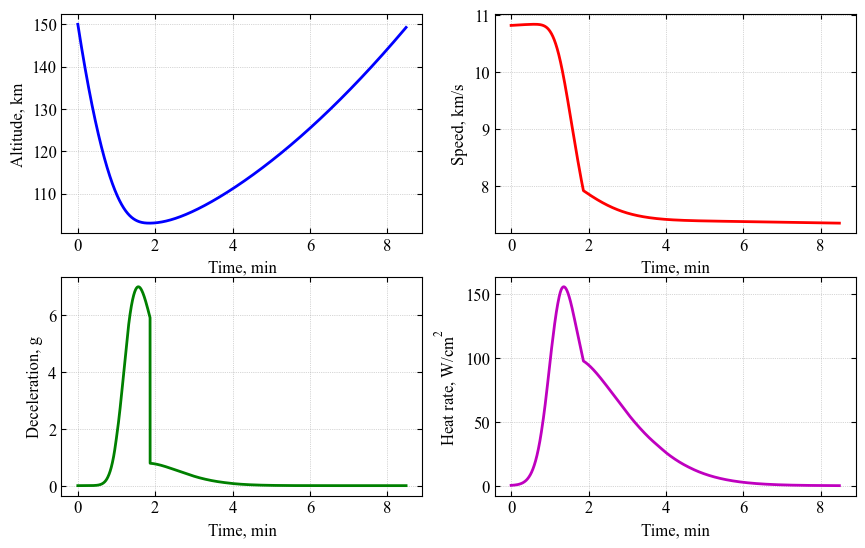

In [9]:
plt.figure(figsize=(10.25, 6.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.subplot(2, 2, 1)
plt.plot(vehicle1.t_min_full, vehicle1.h_km_full, 'b-', linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Altitude, km',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.subplot(2, 2, 2)
plt.plot(vehicle1.t_min_full, vehicle1.v_kms_full, 'r-', linewidth=2.0)
plt.ylabel('Speed, km/s',fontsize=12)
plt.xlabel('Time, min',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)



plt.subplot(2, 2, 3)
plt.plot(vehicle1.t_min_full, vehicle1.acc_net_g_full, 'g-', linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Deceleration, g',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.subplot(2, 2, 4)
plt.plot(vehicle1.t_min_full, vehicle1.q_stag_total_full, 'm-', linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.savefig('../photon-and-aerocapture-plots/venus.png', dpi= 300,bbox_inches='tight')
plt.show()

In [11]:
approach1 = Approach("VENUS", v_inf_vec_icrf_kms=np.array([-3.26907095,  0.67649492, -1.06977471]),
                            rp=(6051.8+200)*1e3, psi=np.pi)

In [12]:
orbiter = PropulsiveOrbiter(approach=approach1, apoapsis_alt_km=400)

In [13]:
orbiter.DV_OI_mag

3515.235392192679

In [14]:
def mf_m0(DV, Isp=320):
    return  1 - 1.10*(1 - np.exp(-DV/(Isp*9.80665)))

In [15]:
mf_m0(DV=3515, Isp=320)

0.2588738489649366